**Introduzione**

Nel contesto della diagnosi del cancro al seno, è essenziale sviluppare modelli predittivi accurati per distinguere tra soggetti affetti da tumore al seno e soggetti sotto controllo medico.

Durante questo studio, è stato implementato un modello di rete neurale utilizzando Keras per la classificazione dei dati medici relativi a questi soggetti, utilizzando il dataset "Breast Cancer Coimbra Dataset" ospitato sull'archivio UCI Machine Learning Repository.

Prima di addestrare la rete neurale, è stato eseguito un rigoroso processo di preparazione dei dati. Questo ha compreso la pulizia del dataset, l'analisi statistica per valutare la distribuzione dei dati e l'individuazione di correlazioni significative tra le variabili.

In particolare, sono stati esaminati parametri statistici come media, mediana, moda e deviazione standard per comprendere la centralità e la dispersione dei dati. Sono stati esplorati grafici e visualizzazioni per migliorare la comprensione della distribuzione delle caratteristiche e delle loro interazioni, inclusa un'analisi della normalità dei dati e la creazione di una matrice di correlazione per identificare pattern o relazioni tra le variabili.

Il dataset utilizzato può essere consultato al seguente link:  
https://archive.ics.uci.edu/dataset/451/breast+cancer+coimbra


In [ ]:
# Per caricare il mio file
from google.colab import files

# Carica il file "dataR2.csv" dal tuo computer locale
uploaded = files.upload()


Saving dataR2.csv to dataR2.csv


In [ ]:
# Importa i pacchetti necessari
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Caricamento del dataset
BK = pd.read_csv("dataR2.csv")

# Visualizzazione delle prime righe del dataset
print(BK.head())

# Informazioni sul dataset
print(BK.info())

# Numero di livelli nella variabile "Classification"
num_levels = len(BK['Classification'].unique())
print(num_levels)

# Visualizza i valori univoci della variabile "Classification"
unique_values = BK['Classification'].unique()
print(unique_values)

# Numero di variabili
num_variables = BK.shape[1]
print("Numero di variabili:", num_variables)

# Tipi di variabili
variable_types = BK.dtypes
print(variable_types)

# Controlla valori mancanti
missing_values = BK.isnull().sum()
print(missing_values)
# Non ci sono valori mancanti


   Age        BMI  Glucose  Insulin      HOMA   Leptin  Adiponectin  Resistin  \
0   48  23.500000       70    2.707  0.467409   8.8071     9.702400   7.99585   
1   83  20.690495       92    3.115  0.706897   8.8438     5.429285   4.06405   
2   82  23.124670       91    4.498  1.009651  17.9393    22.432040   9.27715   
3   68  21.367521       77    3.226  0.612725   9.8827     7.169560  12.76600   
4   86  21.111111       92    3.549  0.805386   6.6994     4.819240  10.57635   

     MCP.1  Classification  
0  417.114               1  
1  468.786               1  
2  554.697               1  
3  928.220               1  
4  773.920               1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             116 non-null    int64  
 1   BMI             116 non-null    float64
 2   Glucose         116 non-null    int64  
 3   Insu

# Il Datase è costitutito da 10 variabili numeriche:

# Age: età;
# BMI: indice di massa corporea;
# Glucose: livelli di glucosio nel sangue;
# Insulin: quantità di insulina somministrata;
# Homa (Homeostasis Model Assessment): metodo di calcolo dell'insulino-resistenza (HOMA-IR (Insulin Resistance) = [Insulina a digiuno (μU/mL) * Glicemia a digiuno (mmol/L)] / 22.5);
# Leptin: ormone prodotto principalmente dalle cellule adipose (aumenta il bilancio energetico inibendo la fame);
# Adiponectin: proteina prodotta dalle cellule adipose che modula una serie di processi metabolici, tra cui la regolazione del glucosio e la degradazione degli acidi grassi;
# Resistin: ormone prodotto dalle cellule adipose e dai macrofagi (può indurre ad una insulino-resistenza)
# MCP.1 (Monocyte Chemoattractant Protein-1): svolge un ruolo cruciale nel reclutamento e nell'attivazione dei monociti, dei macrofagi e delle cellule T al sito di infiammazione
# Classification: 1 - Sotto controllo medico, 2 - Paziente




########### PRE-PROCESSING ###########






In [ ]:
# Analisi Statistiche

# Calcola la moda per ogni variabile numerica
def calcola_moda(x):
    if np.issubdtype(x.dtype, np.number):
        unique_values, counts = np.unique(x, return_counts=True)
        return unique_values[np.argmax(counts)]
    else:
        return "Non applicabile"

moda = BK.apply(calcola_moda)

# Escludi la variabile target "Classification" dal calcolo della media e della mediana
variabili_numeriche = BK.select_dtypes(include=np.number).drop(columns=["Classification"])

# Calcola la media per ogni variabile numerica
media = variabili_numeriche.mean()

# Calcola la mediana per ogni variabile numerica
mediana = variabili_numeriche.median()

# Visualizza i risultati
result = pd.DataFrame({'Variabile': BK.columns, 'Moda': moda, 'Media': media, 'Mediana': mediana})
print(result)

                     Variabile         Moda       Media     Mediana
Adiponectin                Age     2.194280   10.180874    8.352692
Age                        BMI    45.000000   57.301724   56.000000
BMI                    Glucose    21.367521   27.582111   27.662416
Classification         Insulin     2.000000         NaN         NaN
Glucose                   HOMA    92.000000   97.793103   92.000000
HOMA                    Leptin     0.467409    2.694988    1.380939
Insulin            Adiponectin     3.226000   10.012086    5.924500
Leptin                Resistin     4.311000   26.615080   20.271000
MCP.1                    MCP.1  1698.440000  534.647000  471.322500
Resistin        Classification     3.210000   14.725966   10.827740


# Per "Age":
# Moda: La moda (valore più frequente) per l'età è 45 anni, indicando che molti pazienti hanno questa età.
# Media: La media dell'età è 57.30 anni, che potrebbe indicare una distribuzione leggermente più alta di soggetti tendenzialmente più anziani nel campione.
# Mediana: La mediana dell'età è 56 anni, che rappresenta l'età centrale nel dataset.

# Per "BMI":
# Moda: La moda per l'Indice di Massa Corporea (BMI) è 21.37. I valori del BMI possono essere interpretati in base alle categorie standard per l'obesità: <18.5 (sottopeso), 18.5-24.9 (normopeso), 25-29.9 (sovrappeso), ≥30 (obeso).
# Media: La media del BMI è 27.58, suggerendo che la maggior parte dei pazienti nel campione potrebbe essere classificata come sovrappeso .
# Mediana: La mediana del BMI è 27.66, confermando una distribuzione tendenzialmente più alta dei valori del BMI.

# Per "Glucose":
# Moda: La moda per il livello di glucosio nel sangue è 92. Qui, i valori del glucosio possono essere valutati rispetto ai criteri per il diabete: ≤99 mg/dL (normale), 100-125 mg/dL (pre-diabete), ≥126 mg/dL (diabete).
# Media: La media del glucosio è 97.79 mg/dL. Un valore medio elevato potrebbe indicare una prevalenza più alta di pazienti senza diabete.
# Mediana: La mediana del glucosio è 92 mg/dL, confermando una distribuzione che potrebbe indicare una prevalenza di pazienti senza diabete.

# Quantità di Insulina Somministrata:
# Moda: La moda per la quantità di insulina somministrata è 3.226 μU/mL.
# Media: La media dell'insulina somministrata è di 10.01 μU/mL, suggerendo una variazione nei dosaggi di insulina nel campione.
# Mediana: La mediana dell'insulina somministrata è 5.9245 μU/mL, confermando la distribuzione dei dosaggi.

# Calcolo dell'Insulino-Resistenza (HOMA):
# Moda: La moda per l'HOMA è 0.4674.
# Media: La media dell'HOMA è 2.69, suggerendo una tendenza verso l'insulino-resistenza nel campione.
# Mediana: La mediana dell'HOMA è 1.3809, confermando la distribuzione dei valori di resistenza insulinica.

# Ormone Leptina:
# Moda: La moda per la leptina è 8.8071 ng/mL.
# Media: La media della leptina è di 26.62 ng/mL, indicando una tendenza generale verso valori elevati nel campione.
# Mediana: La mediana della leptina è 20.271 ng/mL, confermando la distribuzione dei livelli di leptina.

# Proteina Adiponectina:
# Moda: La moda per l'adiponectina è 2.19428 μg/mL.
# Media: La media dell'adiponectina è di 10.18 μg/mL, suggerendo una variazione nei livelli di adiponectina nel campione.
# Mediana: La mediana dell'adiponectina è 8.352692 μg/mL, confermando la distribuzione dei livelli di adiponectina.

# Ormone Resistin:
# Moda: La moda per la resistina è 7.99585 ng/mL.
# Media: La media della resistina è di 14.73 ng/mL, indicando una tendenza generale verso valori elevati nel campione.
# Mediana: La mediana della resistina è 10.82774 ng/mL, confermando la distribuzione dei livelli di resistina.

# MCP.1 (Monocyte Chemoattractant Protein-1):
# Moda: La moda per MCP.1 è 1698.44 pg/mL.
# Media: La media per MCP.1 è di 534.65 pg/mL, suggerendo una variazione nei livelli di MCP.1 nel campione.
# Mediana: La mediana per MCP.1 è 471.3225 pg/mL, confermando la distribuzione dei livelli di MCP.1.

# Classificazione dei Pazienti:
# La categoria "2" indica pazienti in trattamento, suggerendo che ci sono più pazienti in trattamento rispetto a quelli sotto controllo medico.



In [ ]:
# Tabelle di Frequenza e Tabelle di Frequenza Percentuale

# Caricamento del dataset
BK = pd.read_csv("dataR2.csv")

# Definizione degli intervalli per età
age_breaks = [0, 40, 60, np.inf]
age_labels = ["Under 40", "40-60", "Over 60"]

# Suddividi età in classi
age_classes = pd.cut(BK['Age'], bins=age_breaks, labels=age_labels, include_lowest=True)

# Tabelle di frequenza e frequenza percentuale per età
age_freq = age_classes.value_counts()
age_percent = age_classes.value_counts(normalize=True) * 100

print("Tabella di frequenza per età:")
print(age_freq)
print("Tabella di frequenza percentuale per età:")
print(age_percent)

# Definizione degli intervalli per BMI
bmi_breaks = [0, 18.5, 24.9, 29.9, np.inf]
bmi_labels = ["Underweight", "Normal", "Overweight", "Obese"]

# Suddividi BMI in classi
bmi_classes = pd.cut(BK['BMI'], bins=bmi_breaks, labels=bmi_labels, include_lowest=True)

# Tabelle di frequenza e frequenza percentuale per BMI
bmi_freq = bmi_classes.value_counts()
bmi_percent = bmi_classes.value_counts(normalize=True) * 100

print("Tabella di frequenza per BMI:")
print(bmi_freq)
print("Tabella di frequenza percentuale per BMI:")
print(bmi_percent)

# Definizione degli intervalli per glucosio
glucose_breaks = [0, 99, 125, np.inf]

# Suddividi glucosio in classi
glucose_classes = pd.cut(BK['Glucose'], bins=glucose_breaks, labels=["Normal", "High", "Very High"], include_lowest=True)

# Tabelle di frequenza e frequenza percentuale per glucosio
glucose_freq = glucose_classes.value_counts()
glucose_percent = glucose_classes.value_counts(normalize=True) * 100

print("Tabella di frequenza per glucosio:")
print(glucose_freq)
print("Tabella di frequenza percentuale per glucosio:")
print(glucose_percent)

# Definizione degli intervalli per Insulin
insulin_breaks = [0, 10, 20, 30, np.inf]

# Suddividi Insulin in classi
insulin_classes = pd.cut(BK['Insulin'], bins=insulin_breaks, labels=["Low", "Normal", "High", "Very High"], include_lowest=True)

# Tabelle di frequenza e frequenza percentuale per Insulin
insulin_freq = insulin_classes.value_counts()
insulin_percent = insulin_classes.value_counts(normalize=True) * 100

print("Tabella di frequenza per Insulin:")
print(insulin_freq)
print("Tabella di frequenza percentuale per Insulin:")
print(insulin_percent)

# Definizione degli intervalli per HOMA
homa_breaks = [0, 2, 4, 6, np.inf]

# Suddividi HOMA in classi
homa_classes = pd.cut(BK['HOMA'], bins=homa_breaks, labels=["Low", "Moderate", "High", "Very High"], include_lowest=True)

# Tabelle di frequenza e frequenza percentuale per HOMA
homa_freq = homa_classes.value_counts()
homa_percent = homa_classes.value_counts(normalize=True) * 100

print("Tabella di frequenza per HOMA:")
print(homa_freq)
print("Tabella di frequenza percentuale per HOMA:")
print(homa_percent)

# Leptin
leptin_breaks = [0, 10, 20, 30, np.inf]

# Suddividi Leptin in classi
leptin_classes = pd.cut(BK['Leptin'], bins=leptin_breaks, labels=["Low", "Moderate", "High", "Very High"], include_lowest=True)

# Tabelle di frequenza e frequenza percentuale per Leptin
leptin_freq = leptin_classes.value_counts()
leptin_percent = leptin_classes.value_counts(normalize=True) * 100

print("Tabella di frequenza per Leptin:")
print(leptin_freq)
print("Tabella di frequenza percentuale per Leptin:")
print(leptin_percent)

# Adiponectin
adiponectin_breaks = [0, 10, 20, 30, np.inf]

# Suddividi Adiponectin in classi
adiponectin_classes = pd.cut(BK['Adiponectin'], bins=adiponectin_breaks, labels=["Low", "Moderate", "High", "Very High"], include_lowest=True)

# Tabelle di frequenza e frequenza percentuale per Adiponectin
adiponectin_freq = adiponectin_classes.value_counts()
adiponectin_percent = adiponectin_classes.value_counts(normalize=True) * 100

print("Tabella di frequenza per Adiponectin:")
print(adiponectin_freq)
print("Tabella di frequenza percentuale per Adiponectin:")
print(adiponectin_percent)

# Resistin
resistin_breaks = [0, 10, 20, 30, np.inf]

# Suddividi Resistin in classi
resistin_classes = pd.cut(BK['Resistin'], bins=resistin_breaks, labels=["Low", "Moderate", "High", "Very High"], include_lowest=True)

# Tabelle di frequenza e frequenza percentuale per Resistin
resistin_freq = resistin_classes.value_counts()
resistin_percent = resistin_classes.value_counts(normalize=True) * 100

print("Tabella di frequenza per Resistin:")
print(resistin_freq)
print("Tabella di frequenza percentuale per Resistin:")
print(resistin_percent)

# MCP.1
mcp1_breaks = [0, 100, 200, 300, np.inf]

# Suddividi MCP.1 in classi
mcp1_classes = pd.cut(BK['MCP.1'], bins=mcp1_breaks, labels=["Low", "Moderate", "High", "Very High"], include_lowest=True)

# Tabelle di frequenza e frequenza percentuale per MCP.1
mcp1_freq = mcp1_classes.value_counts()
mcp1_percent = mcp1_classes.value_counts(normalize=True) * 100

print("Tabella di frequenza per MCP.1:")
print(mcp1_freq)
print("Tabella di frequenza percentuale per MCP.1:")
print(mcp1_percent)

# Classification
classification_freq = BK['Classification'].value_counts()
classification_percent = BK['Classification'].value_counts(normalize=True) * 100

print("Tabella di frequenza per Classification:")


Tabella di frequenza per età:
Age
Over 60     52
40-60       47
Under 40    17
Name: count, dtype: int64
Tabella di frequenza percentuale per età:
Age
Over 60     44.827586
40-60       40.517241
Under 40    14.655172
Name: proportion, dtype: float64
Tabella di frequenza per BMI:
BMI
Normal         39
Obese          39
Overweight     37
Underweight     1
Name: count, dtype: int64
Tabella di frequenza percentuale per BMI:
BMI
Normal         33.620690
Obese          33.620690
Overweight     31.896552
Underweight     0.862069
Name: proportion, dtype: float64
Tabella di frequenza per glucosio:
Glucose
Normal       78
High         27
Very High    11
Name: count, dtype: int64
Tabella di frequenza percentuale per glucosio:
Glucose
Normal       67.241379
High         23.275862
Very High     9.482759
Name: proportion, dtype: float64
Tabella di frequenza per Insulin:
Insulin
Low          81
Normal       22
Very High     7
High          6
Name: count, dtype: int64
Tabella di frequenza percentuale 

# Età:
# La distribuzione dell'età mostra che il 45% dei partecipanti ha un'età compresa tra 40 e 60 anni, seguito dal 44% di individui con età superiore a 60 anni. Solo il 15% ha un'età inferiore ai 40 anni.

# BMI:
# La maggioranza dei partecipanti ha un BMI nella categoria "Normale" (34%), seguita da "Obeso" e "Sovrappeso", entrambe al 33%. Solo lo 0,86% è classificato come "Sottopeso".

# Glucosio:
# Il 67% dei partecipanti mostra livelli normali di glucosio, mentre il 23% ha livelli elevati e il 9,5% ha livelli molto elevati.

# Insulina:
# La maggioranza dei partecipanti ha livelli di insulina nella categoria "Bassa" (70%), mentre il 18,97% ha livelli normali, il 5,17% ha livelli alti e il 6,03% ha livelli molto alti.

# HOMA:
# La maggior parte dei partecipanti presenta un valore HOMA nella categoria "Bassa" (63,79%), seguita da "Molto alta" (9,48%), "Moderata" (19,83%) e "Alta" (6,90%).

# Leptina:
# Il 33,62% dei partecipanti ha livelli "Molto alti" di leptina, mentre il 30,17% ha livelli "Moderati", il 18,97% ha livelli "Alti" e il 18,97% ha livelli "Bassi".

# Adiponectina:
# La maggioranza dei partecipanti ha livelli "Bassi" di adiponectina (63,79%), seguita da "Moderati" (24,14%), "Alti" (9,48%) e "Molto alti" (2,59%).

# Resistina:
# Il 42,24% dei partecipanti ha livelli "Bassi" di resistina, il 35,34% ha livelli "Moderati", il 15,52% ha livelli "Alti" e il 6,90% ha livelli "Molto alti".

# MCP.1:
# La maggior parte dei partecipanti ha livelli "Molto alti" di MCP.1 (72,41%), seguita da "Alti" (16,38%), "Moderati" (6,90%) e "Bassi" (4,31%).

# Classificazione:
# Il 55,17% dei partecipanti è classificato come "Paziente", mentre il 44,83% è classificato come "Sotto controllo medico".



Variabile: Age, Statistica Shapiro-Wilk: 0.9691632986068726, p-value: 0.008933299221098423
Variabile: BMI, Statistica Shapiro-Wilk: 0.9683722853660583, p-value: 0.0076538678258657455
Variabile: Glucose, Statistica Shapiro-Wilk: 0.7543898224830627, p-value: 1.201480972004565e-12
Variabile: Insulin, Statistica Shapiro-Wilk: 0.6804084181785583, p-value: 1.5076046354779542e-14
Variabile: HOMA, Statistica Shapiro-Wilk: 0.5580317974090576, p-value: 4.300182786779395e-17
Variabile: Leptin, Statistica Shapiro-Wilk: 0.8702189922332764, p-value: 1.186820508536357e-08
Variabile: Adiponectin, Statistica Shapiro-Wilk: 0.8286809325218201, p-value: 2.7649502132298664e-10
Variabile: Resistin, Statistica Shapiro-Wilk: 0.7453122138977051, p-value: 6.705292245924588e-13
Variabile: MCP.1, Statistica Shapiro-Wilk: 0.8843780755996704, p-value: 5.076909914691896e-08


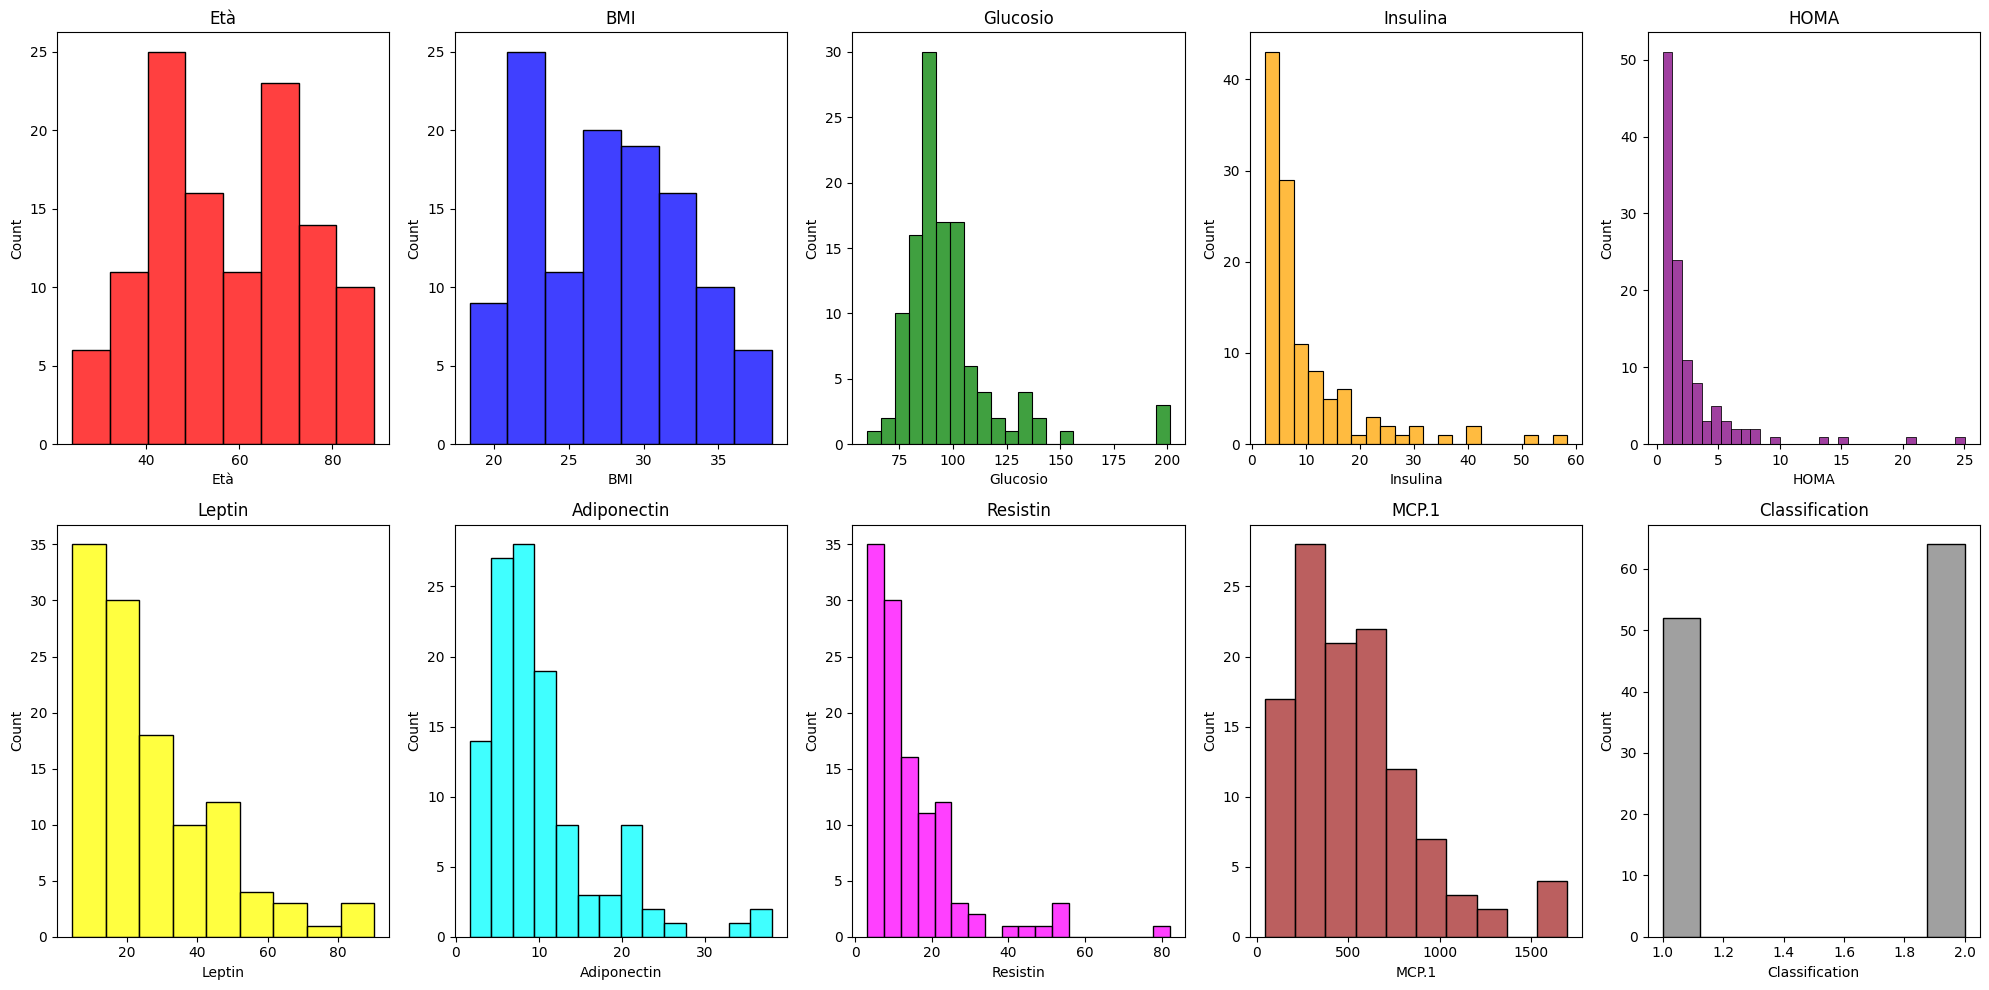

In [ ]:
# Importa matplotlib.pyplot e seaborn per visualizzare le distribuzioni delle variabili
import matplotlib.pyplot as plt
import seaborn as sns

# Creazione di 10 colori diversi per i grafici
my_colors = ["red", "blue", "green", "orange", "purple", "yellow", "cyan", "magenta", "brown", "gray"]

# Visualizzazione delle distribuzioni
fig, axes = plt.subplots(2, 5, figsize=(20, 10))

# Grafici di distribuzione per le prime 5 variabili
sns.histplot(BK['Age'], ax=axes[0, 0], color=my_colors[0]).set(title="Età", xlabel="Età")
sns.histplot(BK['BMI'], ax=axes[0, 1], color=my_colors[1]).set(title="BMI", xlabel="BMI")
sns.histplot(BK['Glucose'], ax=axes[0, 2], color=my_colors[2]).set(title="Glucosio", xlabel="Glucosio")
sns.histplot(BK['Insulin'], ax=axes[0, 3], color=my_colors[3]).set(title="Insulina", xlabel="Insulina")
sns.histplot(BK['HOMA'], ax=axes[0, 4], color=my_colors[4]).set(title="HOMA", xlabel="HOMA")

# Grafici di distribuzione per le ultime 5 variabili
sns.histplot(BK['Leptin'], ax=axes[1, 0], color=my_colors[5]).set(title="Leptin", xlabel="Leptin")
sns.histplot(BK['Adiponectin'], ax=axes[1, 1], color=my_colors[6]).set(title="Adiponectin", xlabel="Adiponectin")
sns.histplot(BK['Resistin'], ax=axes[1, 2], color=my_colors[7]).set(title="Resistin", xlabel="Resistin")
sns.histplot(BK['MCP.1'], ax=axes[1, 3], color=my_colors[8]).set(title="MCP.1", xlabel="MCP.1")
sns.histplot(BK['Classification'], ax=axes[1, 4], color=my_colors[9]).set(title="Classification", xlabel="Classification")

plt.tight_layout()



# Importo scipy.stats per eseguire una verifica di normalità sulle variabili quantitative
from scipy.stats import shapiro

# Lista delle colonne del dataset escludendo la variabile target 'Classification'
columns_to_check = BK.columns.drop('Classification')

# Ciclo attraverso ogni colonna per verificare la normalità
for column in columns_to_check:
    # Esegui il test di normalità di Shapiro-Wilk
    stat, p_value = shapiro(BK[column])
    # Visualizza il risultato
    print(f"Variabile: {column}, Statistica Shapiro-Wilk: {stat}, p-value: {p_value}")


Age: La statistica di Shapiro-Wilk è 0.969, mentre il p-value è 0.009. Questo indica che i dati non seguono una distribuzione normale poiché il p-value è inferiore al livello di significatività comune del 5%.

BMI: La statistica di Shapiro-Wilk è 0.968, con un p-value di 0.008. Anche in questo caso, i dati non soddisfano l'assunzione di normalità.

Glucose: La statistica di Shapiro-Wilk è 0.754, mentre il p-value è essenzialmente 0. Questo suggerisce fortemente che i dati non provengono da una distribuzione normale.

Insulin: La statistica di Shapiro-Wilk è 0.680, con un p-value molto basso, vicino allo 0. Anche qui, i dati non sono distribuiti normalmente.

HOMA: La statistica di Shapiro-Wilk è 0.558, con un p-value molto basso, indicando una forte evidenza contro l'ipotesi di normalità.

Leptin: La statistica di Shapiro-Wilk è 0.870, con un p-value molto basso. Anche in questo caso, i dati non seguono una distribuzione normale.

Adiponectin: La statistica di Shapiro-Wilk è 0.829, con un p-value molto basso. Questo suggerisce che i dati non sono normalmente distribuiti.

Resistin: La statistica di Shapiro-Wilk è 0.745, con un p-value molto basso. Anche in questo caso, i dati non soddisfano l'assunzione di normalità.

MCP.1: La statistica di Shapiro-Wilk è 0.884, con un p-value molto basso. Questo indica che i dati non seguono una distribuzione normale.

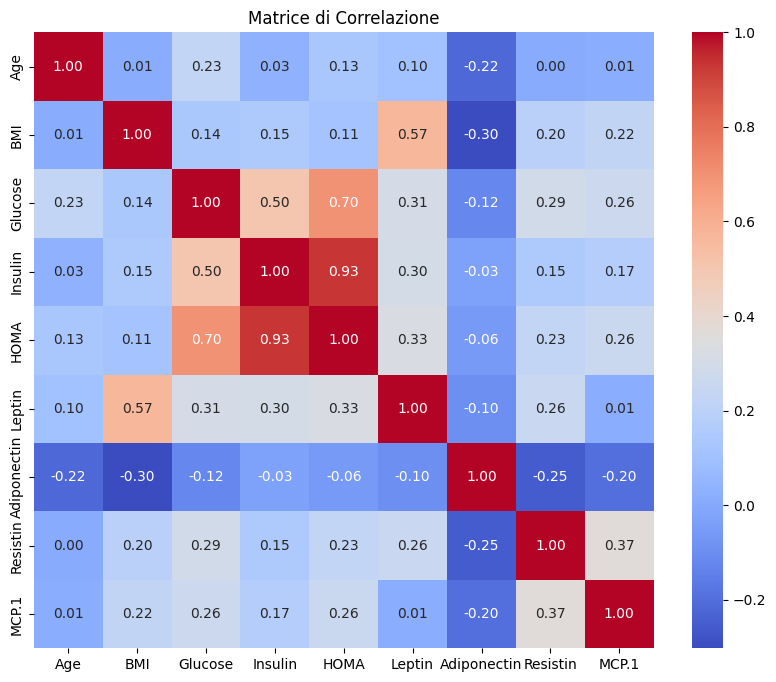

Matrice di Correlazione:
                  Age       BMI   Glucose   Insulin      HOMA    Leptin  \
Age          1.000000  0.008530  0.230106  0.032495  0.127033  0.102626   
BMI          0.008530  1.000000  0.138845  0.145295  0.114480  0.569593   
Glucose      0.230106  0.138845  1.000000  0.504653  0.696212  0.305080   
Insulin      0.032495  0.145295  0.504653  1.000000  0.932198  0.301462   
HOMA         0.127033  0.114480  0.696212  0.932198  1.000000  0.327210   
Leptin       0.102626  0.569593  0.305080  0.301462  0.327210  1.000000   
Adiponectin -0.219813 -0.302735 -0.122121 -0.031296 -0.056337 -0.095389   
Resistin     0.002742  0.195350  0.291327  0.146731  0.231101  0.256234   
MCP.1        0.013462  0.224038  0.264879  0.174356  0.259529  0.014009   

             Adiponectin  Resistin     MCP.1  
Age            -0.219813  0.002742  0.013462  
BMI            -0.302735  0.195350  0.224038  
Glucose        -0.122121  0.291327  0.264879  
Insulin        -0.031296  0.146731  

In [ ]:
# Calcola la matrice di correlazione per esaminare le relazioni tra le variabili quantitative nel dataset
corr_matrix = BK.drop(columns=["Classification"]).corr()

# Visualizza la matrice di correlazione in forma grafica
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title("Matrice di Correlazione")
plt.show()

# Stampa la matrice di correlazione
print("Matrice di Correlazione:")
print(corr_matrix)

# La variabile "Glucose" mostra una correlazione positiva significativa con le altre variabili, in particolare con "Insulin" (0.5047) e "HOMA" (0.6962), indicando che livelli più alti di glucosio possono essere associati a valori più alti di insulina e ad una maggiore resistenza insulinica.
# "Insulin" e "HOMA" mostrano una correlazione molto forte tra di loro (0.9322), il che è atteso poiché il calcolo di HOMA dipende direttamente dalla concentrazione di insulina.
# "BMI" mostra una correlazione positiva moderata con "Leptin" (0.5696), indicando che valori più alti di BMI sono associati a livelli più alti di leptina, un ormone associato al controllo dell'appetito e al metabolismo.
# "Adiponectin" mostra una correlazione negativa moderata con "BMI" (-0.3027) e "Resistin" (-0.2524), indicando che valori più alti di adiponectina sono associati a valori più bassi di BMI e resistina.
# Altre correlazioni rilevanti includono la correlazione positiva tra "Leptin" e "Resistin" (0.2562) e la correlazione moderata tra "Resistin" e "MCP.1" (0.3665).
# Le altre variabili mostrano correlazioni relativamente deboli tra di loro.


In [ ]:
# Calcolo delle correlazioni con "Classification" utilizzando il coefficiente di correlazione di Pearson

# Calcola le correlazioni con Classification
correlation_with_classification = BK.drop(columns=["Classification"]).corrwith(BK["Classification"])

# Visualizza le correlazioni
print(correlation_with_classification)


Age           -0.043555
BMI           -0.132586
Glucose        0.384315
Insulin        0.276804
HOMA           0.284012
Leptin        -0.001078
Adiponectin   -0.019490
Resistin       0.227310
MCP.1          0.091381
dtype: float64


# Le correlazioni con la variabile "Classification" sono le seguenti:
# - "Glucose" ha una correlazione positiva significativa (0.3843), suggerendo che livelli più alti di glucosio possono essere associati a una classificazione positiva.
# - "Insulin" (0.2768) e "HOMA" (0.2840) mostrano correlazioni positive con "Classification", sebbene leggermente meno forti rispetto a "Glucose".
# - "BMI" (-0.1326) e "Adiponectin" (-0.0195) mostrano correlazioni negative, suggerendo che valori più bassi possono essere associati a una classificazione positiva.
# - Le altre variabili ("Age", "Leptin", "Resistin", "MCP.1") mostrano correlazioni relativamente deboli con "Classification".




#################### PROCESSING #######################

In [ ]:
# Importa i pacchetti necessari per implementare una rete neurale con Keras
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Divide il dataset in features e target
X = BK.drop('Classification', axis=1)
y = BK['Classification']

# Trasformazione della variabile target in 0 e 1
y = (y - 1).astype(int)

# Divide il dataset in training set e test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizzazione dei dati
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definizione del modello della rete neurale
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compilazione del modello
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Addestramento del modello
history = model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Valutazione del modello sul test set
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)




Epoch 1/10
3/3 [==============================] - 1s 116ms/step - loss: 0.7085 - accuracy: 0.4384 - val_loss: 0.6938 - val_accuracy: 0.4211
Epoch 2/10
3/3 [==============================] - 0s 19ms/step - loss: 0.6901 - accuracy: 0.4795 - val_loss: 0.6705 - val_accuracy: 0.4737
Epoch 3/10
3/3 [==============================] - 0s 28ms/step - loss: 0.6763 - accuracy: 0.4932 - val_loss: 0.6521 - val_accuracy: 0.5789
Epoch 4/10
3/3 [==============================] - 0s 19ms/step - loss: 0.6622 - accuracy: 0.5753 - val_loss: 0.6366 - val_accuracy: 0.7895
Epoch 5/10
3/3 [==============================] - 0s 19ms/step - loss: 0.6509 - accuracy: 0.6849 - val_loss: 0.6245 - val_accuracy: 0.7895
Epoch 6/10
3/3 [==============================] - 0s 18ms/step - loss: 0.6404 - accuracy: 0.6986 - val_loss: 0.6167 - val_accuracy: 0.7368
Epoch 7/10
3/3 [==============================] - 0s 19ms/step - loss: 0.6302 - accuracy: 0.7397 - val_loss: 0.6089 - val_accuracy: 0.7368
Epoch 8/10
3/3 [==========


- Loss e Accuracy durante l'addestramento:

All'inizio delle 10 epoche, il modello ha iniziato con una loss di circa 0.7085 e un'accuracy del 43.84%.
Alla fine delle 10 epoche, la loss è diminuita a circa 0.6058 e l'accuracy è migliorata al 75.34%.
Questo indica che il modello ha continuato a migliorare man mano che apprendeva dai dati di addestramento, raggiungendo un livello significativamente migliore di precisione e riducendo la loss.

- Loss e Accuracy durante la validazione:

All'inizio, la loss di validazione era di circa 0.6938 con un'accuracy del 42.11%. Alla fine delle 10 epoche, la loss di validazione è scesa a circa 0.5838
e l'accuracy è aumentata al 73.68%.
Nonostante una leggera differenza rispetto alla loss di addestramento, l'accuracy finale sulla validazione mostra che il modello ha generalizzato bene ai dati non visti, mantenendo un livello alto di accuratezza.

- Test Loss e Test Accuracy:

Dopo l'addestramento, il modello è stato valutato su un set di test separato.
Il test loss è stato di circa 0.5826 e il test accuracy è stato del 79.17%.
Questi risultati sono positivi e indicano che il modello è in grado di generalizzare bene su nuovi dati, con un'accuracy molto simile a quella ottenuta durante l'addestramento

1/1 [==============================] - 0s 186ms/step
Matrice di Confusione:
[[ 9  3]
 [ 2 10]]
Report di Classificazione:
              precision    recall  f1-score   support

           0       0.82      0.75      0.78        12
           1       0.77      0.83      0.80        12

    accuracy                           0.79        24
   macro avg       0.79      0.79      0.79        24
weighted avg       0.79      0.79      0.79        24



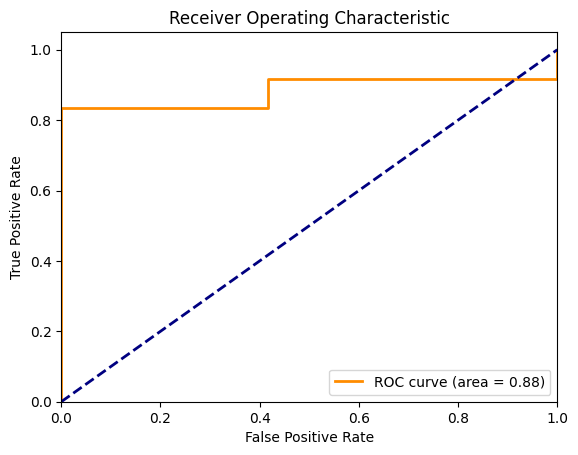

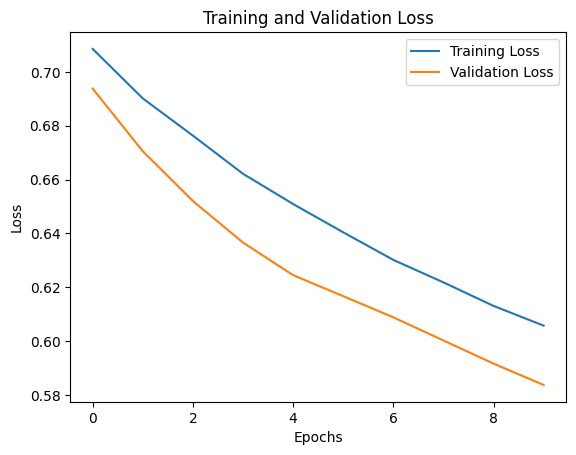

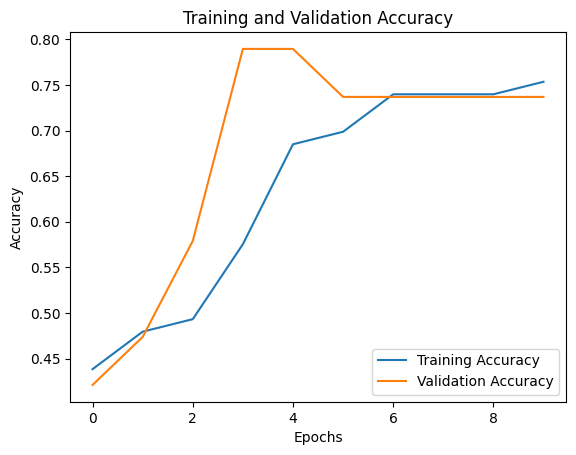

In [ ]:
# Calcolo altre metriche per il mio modello neurale con Keras

# Importa i pacchetti necessari per creare la Confusion Matrix e la Roc Curv
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

# Predizione delle probabilità delle classi
y_pred_proba = model.predict(X_test_scaled)

# Conversione delle probabilità in classi
y_pred = (y_pred_proba > 0.5).astype(int)

# Calcolo della matrice di confusione
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matrice di Confusione:")
print(conf_matrix)

# Report di Classificazione
from sklearn.metrics import classification_report
class_report = classification_report(y_test, y_pred)
print("Report di Classificazione:")
print(class_report)

# Curve ROC e AUC
from sklearn.metrics import roc_curve, auc


# Calcolo della curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot della curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Grafico dell'andamento di Loss e Accuracy durante l'addestramento
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()






- La matrice di confusione mostra la distribuzione delle previsioni del modello rispetto alle classi effettive.

Nella matrice, i valori sulla diagonale principale rappresentano le previsioni corrette, mentre i valori al di fuori della diagonale sono le previsioni errate. Nel dettaglio:

Veri Negativi (TN): 9 casi in cui il modello ha previsto correttamente la classe 0.
Falsi Positivi (FP): 3 casi in cui il modello ha predetto erroneamente la classe 1 quando in realtà era la classe 0.
Falsi Negativi (FN): 2 casi in cui il modello ha previsto erroneamente la classe 0 quando in realtà era la classe 1.
Veri Positivi (TP): 10 casi in cui il modello ha previsto correttamente la classe 1.

- Report di Classificazione:

Il report di classificazione fornisce una panoramica dettagliata delle prestazioni del modello, includendo metriche come precision, recall, f1-score e support per ciascuna classe.

- Classe 0 (Sotto controllo medico):

Precision: 0.82, che indica che l'82% delle istanze predette come classe 0 sono effettivamente della classe 0.

Recall: 0.75, che indica che il 75% di tutte le istanze della classe 0 nel dataset sono state correttamente identificate dal modello.

F1-score: 0.78, indicando un buon equilibrio tra precisione e recall nella previsione di questa classe.

- Classe 1 (Paziente):

Precision: 0.77, che indica che il 77% delle istanze predette come classe 1 sono effettivamente della classe 1.

Recall: 0.83, che indica che l'83% di tutte le istanze della classe 1 nel dataset sono state correttamente identificate dal modello.

F1-score: 0.80, indicando un'ottima combinazione di precisione e recall per questa classe.  

- Accuracy complessiva:

L'accuracy del modello è del 79%, il che significa che il 79% delle istanze nel test set sono state previste correttamente dal modello.

Questi risultati mostrano che il modello ha ottenuto buone prestazioni nella classificazione delle due classi, con una precisione e un recall elevati per entrambe. La matrice di confusione evidenzia che il modello ha previsto con precisione sia la classe 0 che la classe 1, sebbene con alcuni falsi positivi e falsi negativi.

**Grafici**

- Area sotto la curva (AUC):   

  L'AUC è una misura della capacità discriminativa del modello.  
  Un'area ROC di 0.88 è considerata molto buona, indicando che il modello ha una buona capacità discriminativa tra le due classi.
   
- Curva al di sopra della diagonale:   

  una curva ROC che sale sopra la diagonale indica che il modello ha una sensibilità (True Positive Rate) maggiore della probabilità di falsi positivi (False Positive Rate), il che significa che il modello è in grado di distinguere meglio tra le classi positive e negative rispetto a un classificatore casuale.


- Grafico LOSS:

  L'andamento nel grafico di training e validation loss suggerisce che il modello sta imparando dai dati di addestramento, poiché entrambi i valori di loss stanno diminuendo costantemente durante le epoche. Tuttavia, la perdita di addestramento è più alta della perdita di validazione, il che potrebbe indicare una certa discrepanza tra le prestazioni del modello sui dati di addestramento e sui dati di validazione.

Possibili cause:

Underfitting: Il modello potrebbe essere eccessivamente semplice per catturare la complessità dei dati di training. Ciò potrebbe limitare la capacità del modello di generalizzare adeguatamente sui dati non visti.


- Grafico Accuracy:

  Le curve di training e validation accuracy mostrano un andamento interessante nel corso delle epoche. Inizialmente, entrambe le curve partono da valori bassi, con la training accuracy leggermente inferiore rispetto alla validation accuracy. Man mano che le epoche procedono, entrambe le curve iniziano a salire, con la validation accuracy mantenuta costantemente sopra la training accuracy, creando una caratteristica "gobba" nel grafico. Verso la sesta epoca, le due curve si uniscono e procedono orizzontalmente verso destra, stabilizzandosi intorno a un'accuracy del 75% per entrambe le curve.

Questo andamento suggerisce che il modello sta migliorando sia sulla training set che sulla validation set, sebbene la validation accuracy rimanga generalmente superiore alla training accuracy durante tutto l'addestramento. La convergenza finale delle due curve indica che il modello ha raggiunto una fase di stabilità nelle sue prestazioni.

**Conclusioni**

In conclusione, l'analisi dei risultati ha mostrato che il modello proposto ha raggiunto un'accuracy del 79% sul set di test, dimostrando una buona capacità di generalizzazione sui dati non visti precedentemente. La matrice di confusione e il report di classificazione hanno evidenziato un equilibrio tra precision e recall per entrambe le classi target. Tuttavia, è emerso che la loss di addestramento è risultata leggermente superiore rispetto alla loss di validazione, suggerendo una possibile necessità di ulteriori ottimizzazioni del modello per ridurre questa discrepanza. In definitiva, il modello ha dimostrato di essere promettente nella classificazione di soggetti sotto controllo medico rispetto ai pazienti.